# Heart Attack Prediction Analysis

In this notebook, we will analyze a dataset from Kaggle that contains information about patients and their heart attack risk factors. Our goal is to build and evaluate machine learning models to predict the likelihood of a heart attack based on various features.

The dataset can be found [here](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/data).


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import LabelEncoder, StandardScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import resample

import scipy.stats as stats


## Data Loading

First, we will load the dataset and take a preliminary look at the data to understand its structure and the types of features it contains.


In [2]:
df = pd.read_csv('heart_attack_prediction_dataset.csv')

## Exploratory Data Analysis (EDA)

Let's perform some exploratory data analysis to understand the distribution of the features and the target variable. This will help us in identifying any potential issues with the data, such as missing values or outliers.


In [3]:
df.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [4]:
df.shape

(8763, 26)

In [5]:
df.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

Check For Missing Values

In [7]:
df.isnull().sum()

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

In [8]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [9]:
#drop Patient ID
df.drop(columns={'Patient ID'},inplace=True)
df.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Check for duplicates

In [10]:
duplicates_exist = df.duplicated().any()
print(duplicates_exist)

False


Check for class imbalance

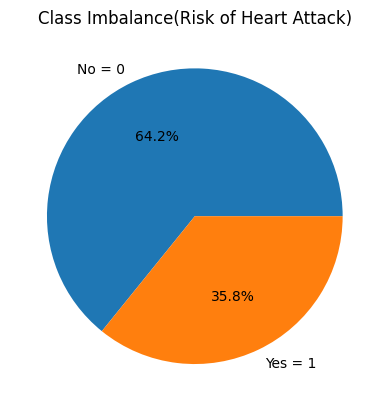

In [11]:
# Create a pie chart of the number of customers for each country origin
labels = ["No = 0", "Yes = 1"]
values = df["Heart Attack Risk"].value_counts().to_numpy()
plt.pie(values, labels=labels, autopct="%1.1f%%")
plt.title("Class Imbalance(Risk of Heart Attack)")
plt.show()

Boxplots for detecting outliers

Feature: Age
Number of outliers: 0
Examples of outliers: Series([], Name: Age, dtype: int64)
Number of inliers: 8763
Feature: Cholesterol
Number of outliers: 0
Examples of outliers: Series([], Name: Cholesterol, dtype: int64)
Number of inliers: 8763
Feature: Heart Rate
Number of outliers: 0
Examples of outliers: Series([], Name: Heart Rate, dtype: int64)
Number of inliers: 8763
Feature: Exercise Hours Per Week
Number of outliers: 0
Examples of outliers: Series([], Name: Exercise Hours Per Week, dtype: float64)
Number of inliers: 8763
Feature: Sedentary Hours Per Day
Number of outliers: 0
Examples of outliers: Series([], Name: Sedentary Hours Per Day, dtype: float64)
Number of inliers: 8763
Feature: Income
Number of outliers: 0
Examples of outliers: Series([], Name: Income, dtype: int64)
Number of inliers: 8763
Feature: BMI
Number of outliers: 0
Examples of outliers: Series([], Name: BMI, dtype: float64)
Number of inliers: 8763
Feature: Triglycerides
Number of outliers: 0
Examples of ou

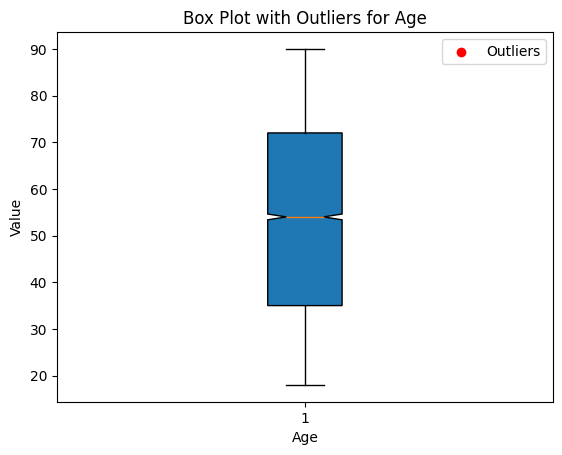

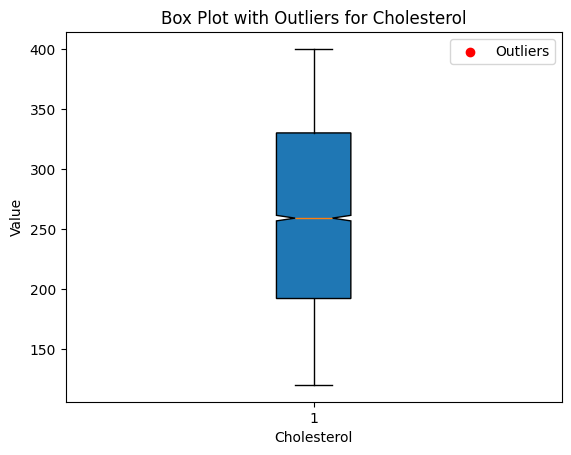

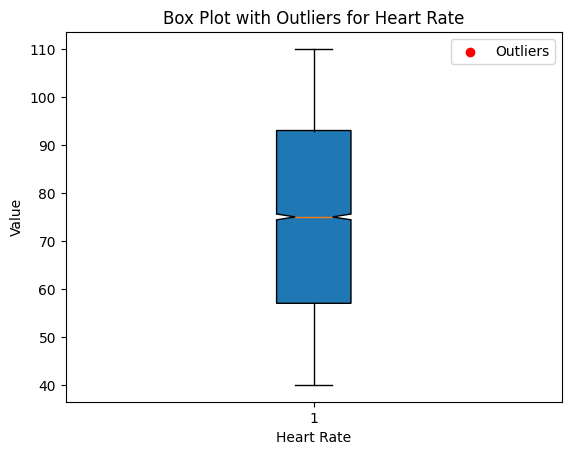

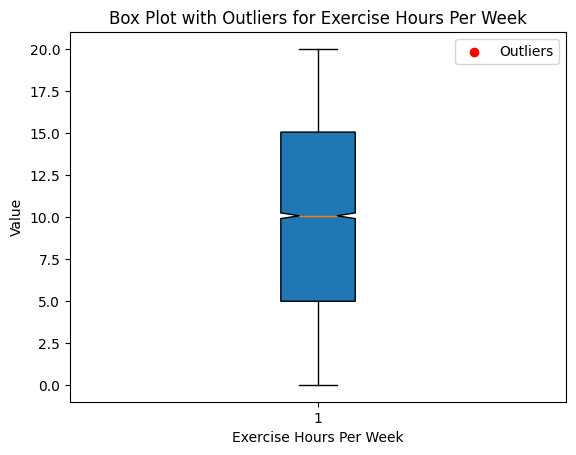

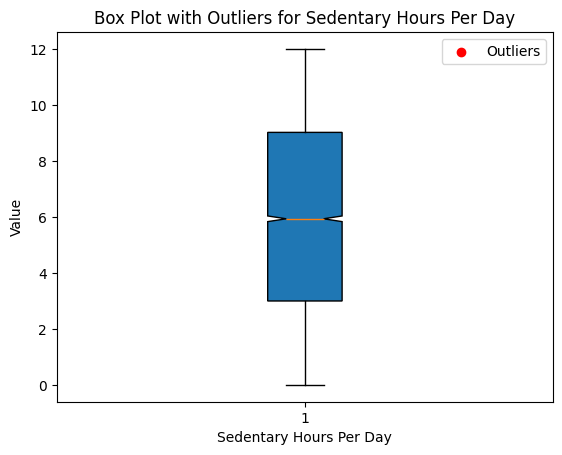

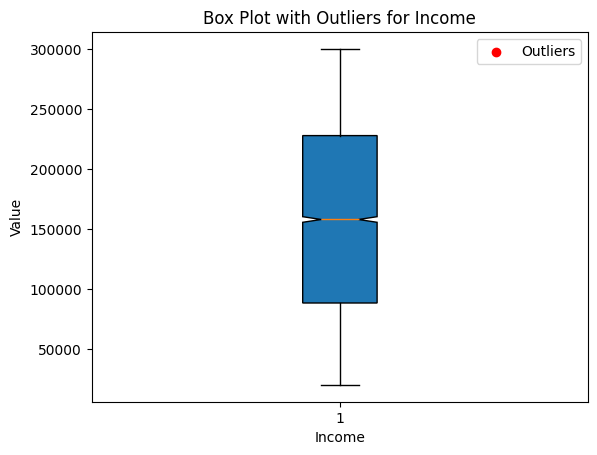

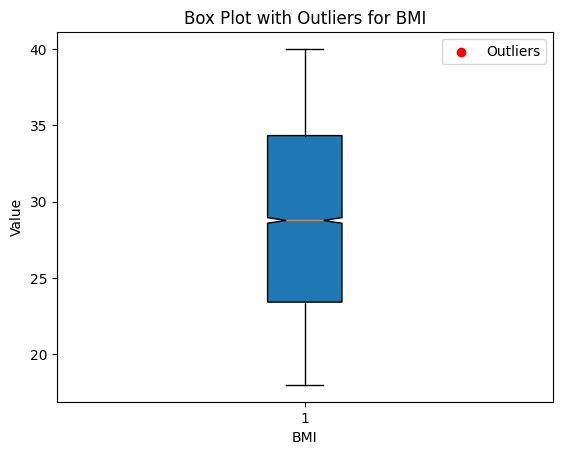

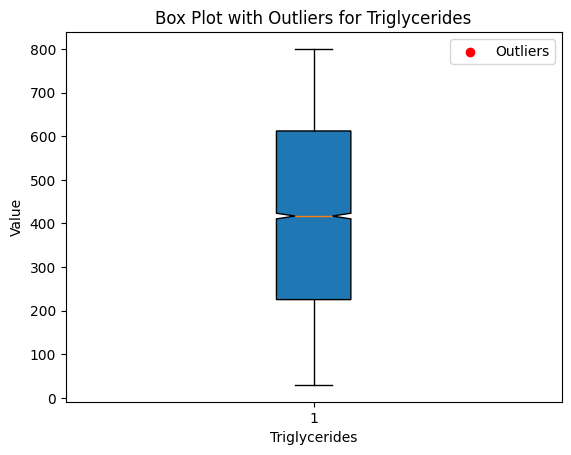

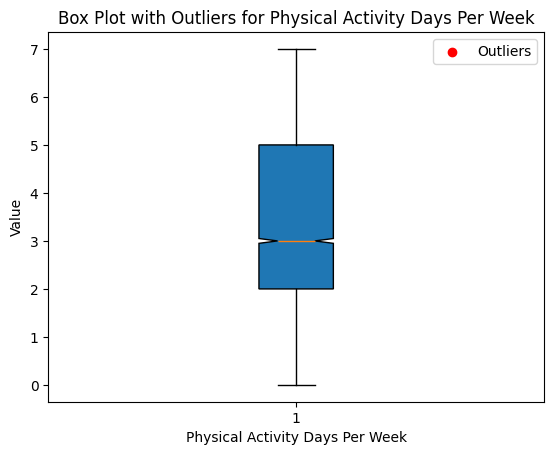

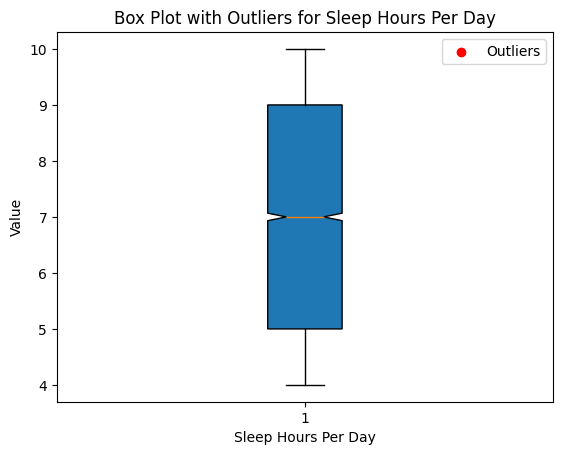

In [12]:
# List of features to visualize using boxplots
numerical_features = ['Age', 'Cholesterol', 'Heart Rate',
                         'Exercise Hours Per Week', 'Sedentary Hours Per Day',
                         'Income', 'BMI', 'Triglycerides',
                         'Physical Activity Days Per Week', 'Sleep Hours Per Day']


# Function to calculate z-scores and identify outliers (threshold can be adjusted)
def detect_outliers_zscore(data, feature, threshold=3):
  z_scores = stats.zscore(data[feature])
  outliers = data[(abs(z_scores) > threshold)][feature]
  inliers = data[(abs(z_scores) <= threshold)][feature]
  print(f"Feature: {feature}")
  print(f"Number of outliers: {len(outliers)}")
  print(f"Examples of outliers: {outliers.head()}")  # View top 5 outliers
  print(f"Number of inliers: {len(inliers)}")
# Apply z-score outlier detection to each numerical feature
for feature in numerical_features:
    if pd.api.types.is_numeric_dtype(df[feature]):  # Check if numerical
        detect_outliers_zscore(df.copy(), feature)
 # Use copy to avoid modifying original df

# Example box plot with outliers highlighted
threshold = 3
outlier_color = 'red'  # Color for outliers in the box plot

for feature in numerical_features:
    if pd.api.types.is_numeric_dtype(df[feature]):  # Check if numerical
        z_scores = stats.zscore(df[feature])
        outliers = df[(abs(z_scores) > threshold)][feature]
        inliers = df[(abs(z_scores) <= threshold)][feature]
        plt.boxplot(df[feature], notch=True, vert=True, patch_artist=True)
        plt.scatter(df.index[outliers], outliers, color=outlier_color, label='Outliers')
        plt.xlabel(feature)
        plt.ylabel('Value')
        plt.title(f"Box Plot with Outliers for {feature}")
        plt.legend()
        plt.show()
        plt.close()


## Data Preprocessing

Before we can train machine learning models, we need to preprocess the data. This includes handling missing values, encoding categorical variables, and scaling numerical features.


Replace blood pressure with blood pressure ratio

In [13]:
df[['BP_Systolic', 'BP_Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)
#  Convert the columns to numeric
df['BP_Systolic'] = pd.to_numeric(df['BP_Systolic'])
df['BP_Diastolic'] = pd.to_numeric(df['BP_Diastolic'])
df['BP_Ratio'] = df['BP_Systolic'] / df['BP_Diastolic']
#Dropping Blood Pressure
df = df.drop(columns=['Blood Pressure','BP_Systolic','BP_Diastolic'], axis = 1)

In [14]:
# find categorical Columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols

['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']

LabelEncoder

In [15]:
# apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])
print(df.head())

   Age  Sex  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0   67    1          208          72         0               0        1   
1   21    1          389          98         1               1        1   
2   21    0          324          72         1               0        0   
3   84    1          383          73         1               1        1   
4   66    1          318          93         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  ...  Income  \
0        0                    0                 4.168189  ...  261404   
1        1                    1                 1.813242  ...  285768   
2        0                    0                 2.078353  ...  235282   
3        0                    1                 9.828130  ...  125640   
4        1                    0                 5.804299  ...  160555   

         BMI  Triglycerides  Physical Activity Days Per Week  \
0  31.251233            286                   

Heatmap to show dependency

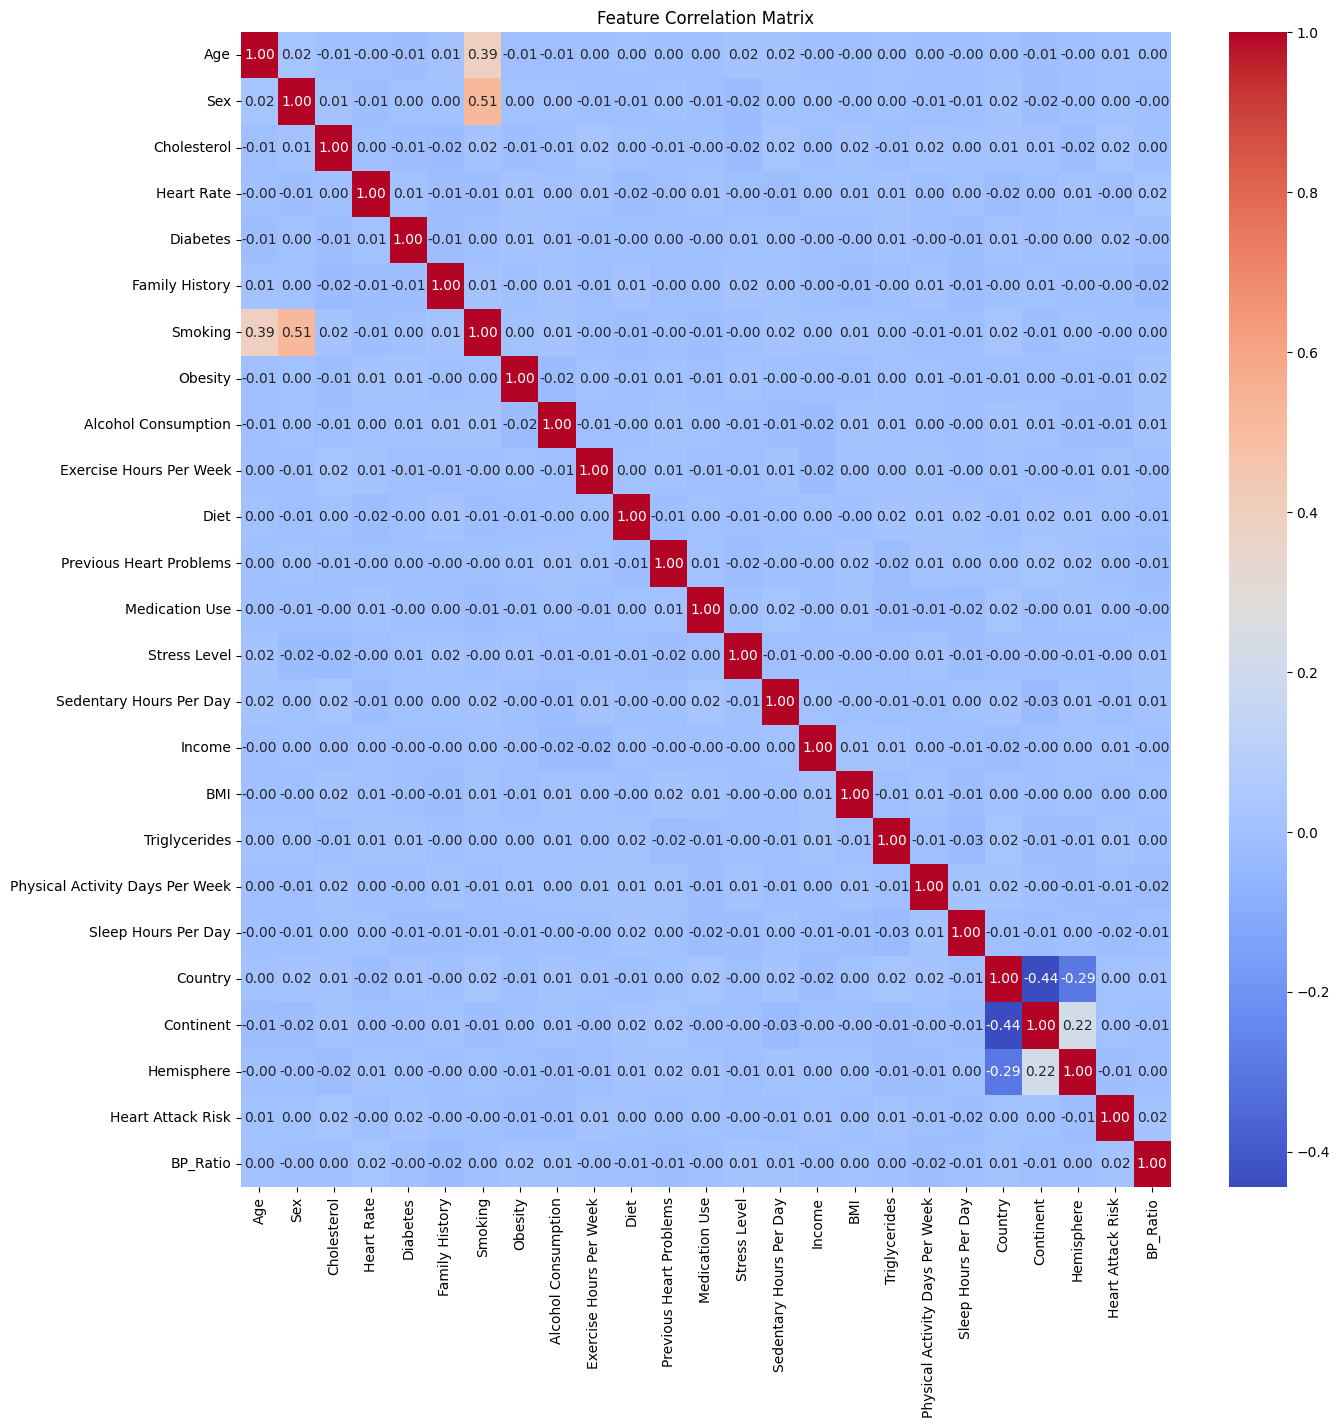

In [16]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


Heatmap after dropping dependent features


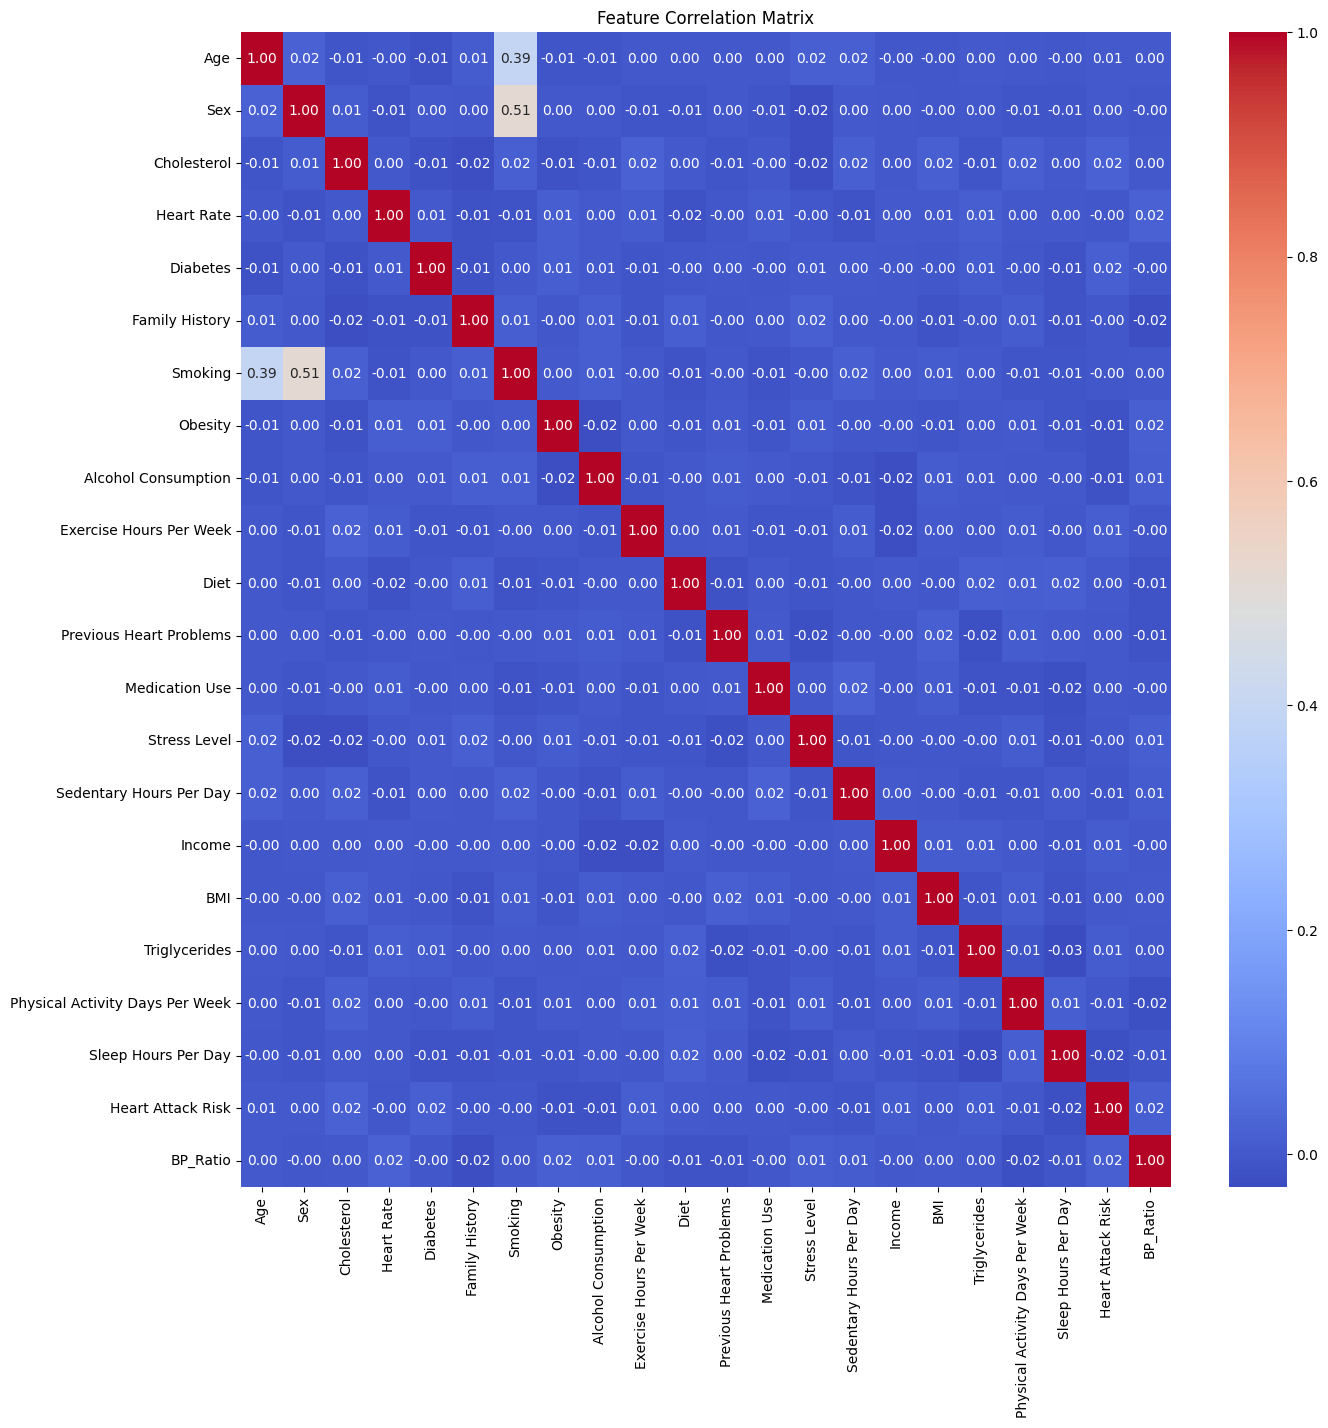

In [17]:
df=df.drop(columns=['Country', 'Continent', 'Hemisphere'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


Visualize data in 3d plot using PCA

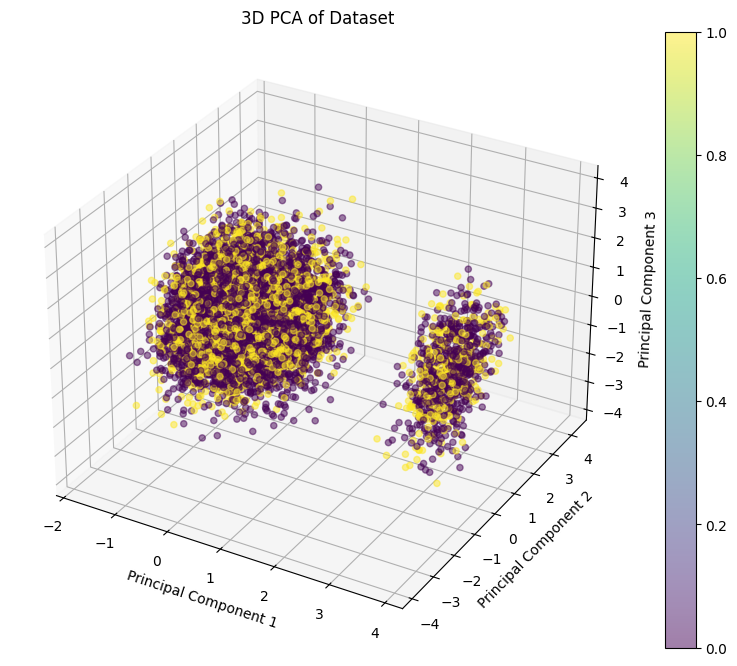

In [18]:
# Scale the data excluding the target variable
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Heart Attack Risk', axis=1))

# Initialize PCA and reduce to three components
pca = PCA(n_components=3)
principal_components = pca.fit_transform(df_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components,
                      columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

# Add the target variable from the original dataframe for coloring
pca_df['Heart Attack Risk'] = df['Heart Attack Risk'].values

# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')  # Set up the axes for 3D plotting

scatter = ax.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], pca_df['Principal Component 3'],
                     alpha=0.5, c=pca_df['Heart Attack Risk'], cmap='viridis')

ax.set_title('3D PCA of Dataset')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')  # This sets up the label for the z-axis

# Add a color bar to show the relationship to 'Heart Attack Risk'
fig.colorbar(scatter)

plt.show()


## Splitting the Data

We will split the dataset into training and testing sets. This will allow us to train our models on one portion of the data and evaluate their performance on another, unseen portion.


Feature reduction and scaling

In [19]:
# Load your dataset
X = df.drop('Heart Attack Risk', axis=1)
y = df['Heart Attack Risk']

# Assuming X and y are defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize PCA with n_components set to 0.9
pca = PCA(n_components=0.9)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)  # Apply PCA transformation to the test set

# Check the shape of the new data sets
print("Original shape: ", X_train.shape)
print("Reduced shape after PCA: ", X_train_pca.shape)

# Print the amount of variance that each PC explains
print("Explained variance ratio:", pca.explained_variance_ratio_)

Original shape:  (7010, 21)
Reduced shape after PCA:  (7010, 19)
Explained variance ratio: [0.07911272 0.05161118 0.05128347 0.05038388 0.05001072 0.04974663
 0.04945953 0.04896669 0.04839445 0.04793121 0.04742272 0.04708679
 0.04682786 0.04609745 0.04562421 0.04496025 0.04482728 0.04456993
 0.04444665]


## Handling Imbalanced Data

If our dataset is imbalanced, we will need to address this to ensure our models perform well across all classes. We will use techniques such as SMOTE (Synthetic Minority Over-sampling Technique) and Random Under-Sampling to balance the data.


In [20]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
rus = RandomUnderSampler(random_state=42)

X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_pca, y_train)
print("After SMOTE - X_train:", X_train_oversampled.shape, "y_train:", y_train_oversampled.shape)


print(y_train_oversampled.value_counts())


After SMOTE - X_train: (8998, 19) y_train: (8998,)
Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64


## Model Training

We will train a variety of machine learning models on the training data, including:

- Random Forest Classifier
- AdaBoost Classifier
- Support Vector Classifier (SVC)

We will use GridSearchCV and RandomizedSearchCV for hyperparameter tuning to find the best parameters for each model.


RandomForestClassifier

In [21]:
# Random Forest parameters for Randomized Search
param_distributions_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10]
}

# Randomized Search with fewer iterations
print("Training Random Forest with Randomized Search...")
rf_model = RandomForestClassifier()
random_search_rf = RandomizedSearchCV(rf_model, param_distributions_rf, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
random_search_rf.fit(X_train_oversampled, y_train_oversampled)

# Best model and evaluation
best_rf_random = random_search_rf.best_estimator_
print(f"Random Forest Best Parameters: {random_search_rf.best_params_}")
y_pred_rf_random = best_rf_random.predict(X_test_pca)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf_random):.2f}")
print(classification_report(y_test, y_pred_rf_random))



Training Random Forest with Randomized Search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest Best Parameters: {'n_estimators': 200, 'min_samples_split': 10, 'max_depth': None}
Random Forest Accuracy: 0.59
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1125
           1       0.40      0.27      0.32       628

    accuracy                           0.59      1753
   macro avg       0.53      0.52      0.51      1753
weighted avg       0.56      0.59      0.57      1753



SVC


In [22]:
# Full SVM parameters for randomized search
param_distributions_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': [ 'rbf', 'sigmoid']
}

# Randomized Search
print("Training SVM with Randomized Search...")
svm_model = SVC()
random_search_svm = RandomizedSearchCV(svm_model, param_distributions_svm, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
random_search_svm.fit(X_train_oversampled, y_train_oversampled)

# Best model and evaluation
best_svm = random_search_svm.best_estimator_
print(f"SVM Best Parameters: {random_search_svm.best_params_}")
y_pred_svm = best_svm.predict(X_test_pca)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")
print(classification_report(y_test, y_pred_svm))


Training SVM with Randomized Search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM Best Parameters: {'kernel': 'rbf', 'gamma': 0.1, 'C': 10}
SVM Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.65      0.70      0.67      1125
           1       0.38      0.33      0.35       628

    accuracy                           0.56      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.56      0.56      1753



AdaBoostClassifier


In [23]:
param_distributions_adaboost = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1]
}

# Randomized Search
print("Training AdaBoost with Randomized Search...")
adaboost_model = AdaBoostClassifier()
random_search_adaboost = RandomizedSearchCV(adaboost_model, param_distributions_adaboost, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
random_search_adaboost.fit(X_train_oversampled, y_train_oversampled)

# Best model and evaluation
best_adaboost = random_search_adaboost.best_estimator_
print(f"AdaBoost Best Parameters: {random_search_adaboost.best_params_}")
y_pred_adaboost = best_adaboost.predict(X_test_pca)
print(f"AdaBoost Accuracy: {accuracy_score(y_test, y_pred_adaboost):.2f}")
print(classification_report(y_test, y_pred_adaboost))


Training AdaBoost with Randomized Search...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
AdaBoost Best Parameters: {'n_estimators': 100, 'learning_rate': 0.5}
AdaBoost Accuracy: 0.50
              precision    recall  f1-score   support

           0       0.64      0.50      0.56      1125
           1       0.35      0.49      0.41       628

    accuracy                           0.50      1753
   macro avg       0.50      0.50      0.49      1753
weighted avg       0.54      0.50      0.51      1753



## Model Evaluation

After training the models, we will evaluate their performance on the test set using various metrics, including confusion matrix and ROC curve.


Visualization for RandomForest


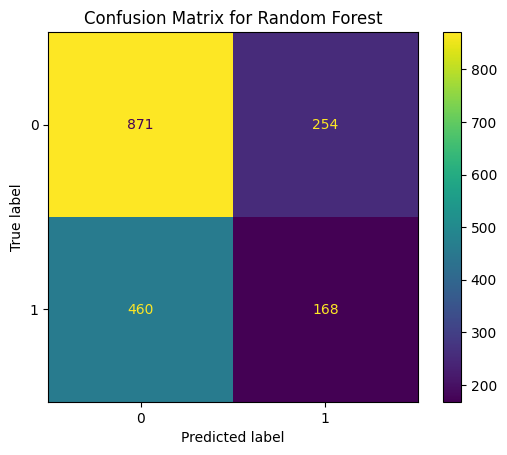

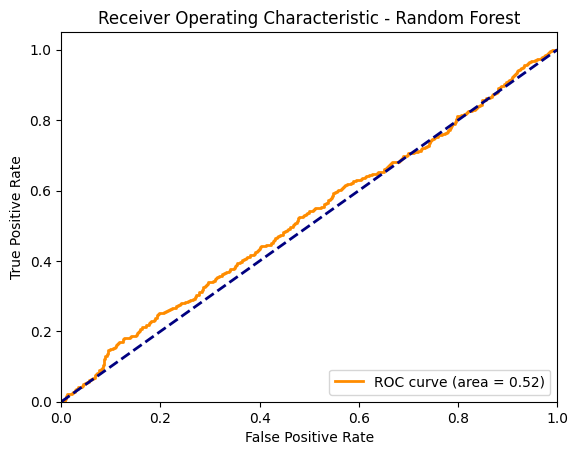

In [24]:
# Confusion Matrix
cm = confusion_matrix(y_test, best_rf_random.predict(X_test_pca))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix for Random Forest')
plt.show()

# ROC Curve
y_scores_rf = best_rf_random.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_scores_rf)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - Random Forest')
plt.legend(loc="lower right")
plt.show()


Visualization for SVM

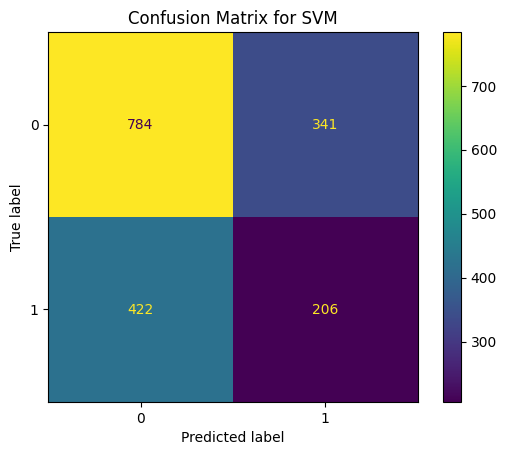

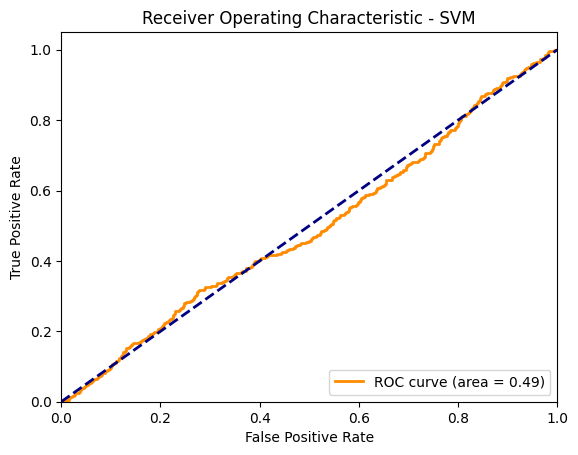

In [25]:
# Confusion Matrix
cm_svm = confusion_matrix(y_test, best_svm.predict(X_test_pca))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot()
plt.title('Confusion Matrix for SVM')
plt.show()

# Since SVM does not naturally output probabilities, we use decision function if ROC is needed
y_scores_svm = best_svm.decision_function(X_test_pca)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - SVM')
plt.legend(loc="lower right")
plt.show()


Visualixation for AdaBoost

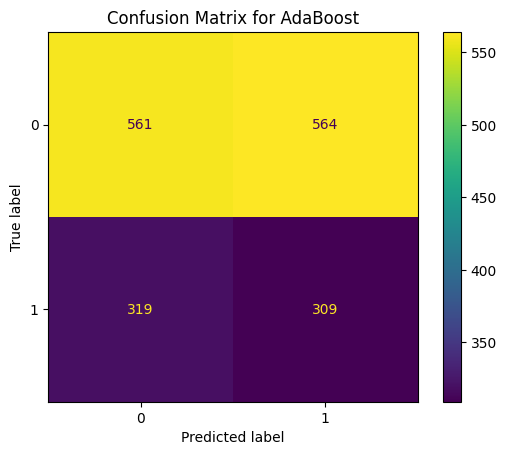

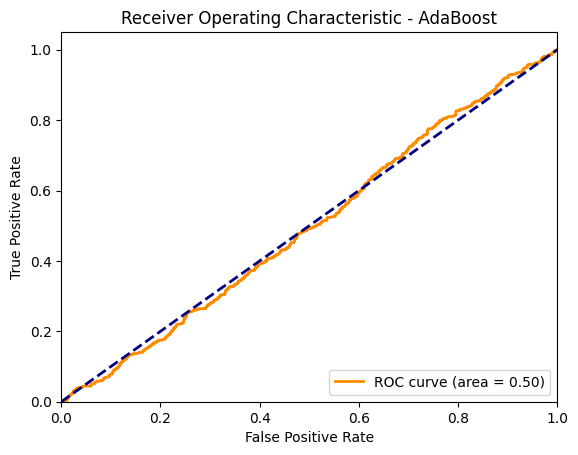

In [26]:
# Confusion Matrix
cm_adaboost = confusion_matrix(y_test, best_adaboost.predict(X_test_pca))
disp_adaboost = ConfusionMatrixDisplay(confusion_matrix=cm_adaboost)
disp_adaboost.plot()
plt.title('Confusion Matrix for AdaBoost')
plt.show()

# ROC Curve for AdaBoost
y_scores_ab = best_adaboost.predict_proba(X_test_pca)[:, 1]
fpr_ab, tpr_ab, thresholds_ab = roc_curve(y_test, y_scores_ab)
roc_auc_ab = auc(fpr_ab, tpr_ab)

plt.figure()
plt.plot(fpr_ab, tpr_ab, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_ab)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - AdaBoost')
plt.legend(loc="lower right")
plt.show()
